In [4]:
import pandas as pd
import numpy as np

In [5]:
df=pd.read_csv('boston.csv')
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [6]:
df.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

In [7]:
# Regression case
corr_with_target = df.corr(numeric_only=True)['MEDV'].abs().sort_values(ascending=False)
print(corr_with_target)

MEDV       1.000000
LSTAT      0.737663
RM         0.695360
PTRATIO    0.507787
INDUS      0.483725
TAX        0.468536
NOX        0.427321
CRIM       0.388305
RAD        0.381626
AGE        0.376955
ZN         0.360445
B          0.333461
DIS        0.249929
CHAS       0.175260
Name: MEDV, dtype: float64


In [8]:
df=df[['CRIM','INDUS','NOX','AGE','RM','RAD','TAX','PTRATIO','LSTAT','MEDV']]


In [9]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

X=df.drop('MEDV',axis=1)
y=df['MEDV']

from sklearn.preprocessing import StandardScaler

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

model=LinearRegression()
model.fit(X_train,y_train)

y_pred=model.predict(X_test)

from sklearn.metrics import accuracy_score, mean_squared_error, r2_score
mse=mean_squared_error(y_test,y_pred)
r2=r2_score(y_test,y_pred)
print(f'Mean Squared Error: {mse}')
print(f'R^2 Score: {r2}')

Mean Squared Error: 25.585194544683944
R^2 Score: 0.6511131235552192


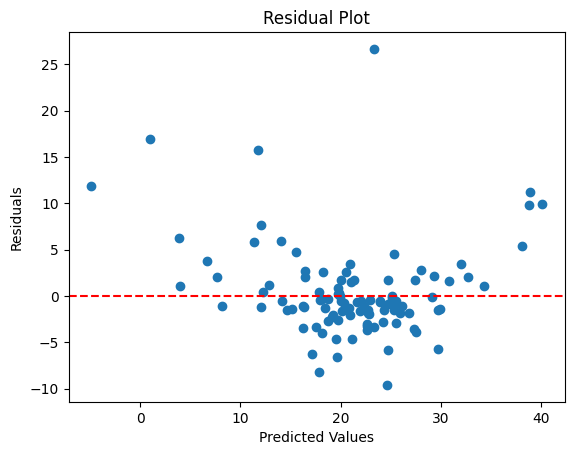

In [10]:
import matplotlib.pyplot as plt
residuals = y_test - y_pred

plt.scatter(y_pred, residuals)
plt.axhline(0, color='r', linestyle='--')
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.title("Residual Plot")
plt.show()


In [ ]:
from sklearn.tree import DecisionTreeRegressor

dt = DecisionTreeRegressor(random_state=42)

dt.fit(X_train,y_train)
y_pred_dt=dt.predict(X_test)
mse_dt=mean_squared_error(y_test,y_pred_dt)
r2_dt=r2_score(y_test,y_pred_dt)
print(f'Decision Tree Mean Squared Error: {mse_dt}')
print(f'Decision Tree R^2 Score: {r2_dt}')

Decision Tree Mean Squared Error: 28.239803921568626
Decision Tree R^2 Score: 0.6149141268243243


In [16]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)
print(f'Random Forest Mean Squared Error: {mse_rf}')
print(f'Random Forest R^2 Score: {r2_rf}')

Random Forest Mean Squared Error: 9.458751470588233
Random Forest R^2 Score: 0.8710178165783506


In [18]:
from sklearn.ensemble import GradientBoostingRegressor
gdr=GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
gdr.fit(X_train, y_train)
y_pred_gdr=gdr.predict(X_test)
mse_gdr=mean_squared_error(y_test,y_pred_gdr)
r2_gdr=r2_score(y_test,y_pred_gdr)
print(f'Gradient Boosting Mean Squared Error: {mse_gdr}')
print(f'Gradient Boosting R^2 Score: {r2_gdr}')

Gradient Boosting Mean Squared Error: 9.29067659623178
Gradient Boosting R^2 Score: 0.8733097326245883


In [17]:
from xgboost import XGBRegressor
xgb = XGBRegressor(objective='reg:squarederror', n_estimators=100, random_state=42)
xgb.fit(X_train, y_train)
y_pred_xgb = xgb.predict(X_test)
mse_xgb = mean_squared_error(y_test, y_pred_xgb)
r2_xgb = r2_score(y_test, y_pred_xgb)
print(f'XGBoost Mean Squared Error: {mse_xgb}')
print(f'XGBoost R^2 Score: {r2_xgb}')

XGBoost Mean Squared Error: 5.812034474023672
XGBoost R^2 Score: 0.9207454705927641


In [19]:
from sklearn.svm import SVR
svr = SVR(kernel='rbf')
svr.fit(X_train, y_train)
y_pred_svr = svr.predict(X_test)
mse_svr = mean_squared_error(y_test, y_pred_svr)
r2_svr = r2_score(y_test, y_pred_svr)
print(f'SVR Mean Squared Error: {mse_svr}')
print(f'SVR R^2 Score: {r2_svr}')

SVR Mean Squared Error: 21.391343806848486
SVR R^2 Score: 0.708301646458324
